In [1]:

#Always include important imports at the top
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV
import time

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report #for nice end formatting
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.decomposition import PCA

In [2]:
# Read the dataset into a pandas DataFrame object
df = pd.read_csv("/Users/arib/Downloads/rwf577.csv")
df


,Age,Reduction,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
#Drop variables with zero variance: EmployeeCount, Over18, and StandardHours
df.drop('EmployeeCount', axis = 1, inplace = True)
df.drop('Over18', axis = 1, inplace = True)
df.drop('StandardHours', axis = 1, inplace = True)

#Replacing Yes/No in the target variable (Attrition) with 1/0
df['Reduction'] = df['Reduction'].map({'No':0, 'Yes':1})

In [4]:
df_f = df.drop(['JobLevel','TotalWorkingYears','YearsInCurrentRole', 'YearsWithCurrManager' , 'PercentSalaryHike'], axis=1)
#Confirm those variables were sucessfully dropped
df_f

,Age,Reduction,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,19479,8,Yes,3,1,0,0,1,6,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,24907,1,No,4,4,1,3,3,10,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2396,6,Yes,3,2,0,3,3,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,23159,1,Yes,3,3,0,3,3,8,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,16632,9,No,3,4,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,12290,4,No,3,3,1,3,3,5,0
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,21457,4,No,3,1,1,5,3,7,1
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,5174,1,Yes,4,2,1,0,3,6,0
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,13243,2,No,3,4,0,3,2,9,0


In [5]:
#Create a function which takes the dataset as input and ouputs the processed dataset
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['Education'] = le.fit_transform(res_df['Education'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    res_df['Reduction'] = le.fit_transform(res_df['Reduction'])
    return res_df

#Run the function on the desired dataset
encoded_df = preprocessor(df_f)

In [6]:

#Selecting features
X = encoded_df.drop(['Reduction'],axis =1)
y = encoded_df['Reduction']
y


0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Reduction, Length: 1470, dtype: int64

In [7]:
#Standardizing features
sc = StandardScaler()
X = sc.fit_transform(X)

#Confirm the new mean and standard deviation of the dataset
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))


Mean: (0, 0)
Standard deviation: (1, 1)


In [9]:

#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 40)


     

#----Gini
start = time.time()

#Instantiate the model, run with gini
dt = DecisionTreeClassifier(max_depth=4, random_state=1,criterion ='gini')
#Fit the model with data
dt.fit(X_train,y_train)

end = time.time()
dt_time = end-start
print('Train Time (seconds) of Gini Decision Tree without PCA:',dt_time)

y_pred_gini = dt.predict(X_test)

#----Entropy
start = time.time()

#Instantiate the model, run with gini
dt1 = DecisionTreeClassifier(max_depth=4, random_state=1,criterion ='entropy')
#Fit the model with data
dt1.fit(X_train,y_train)

end = time.time()
dt1_time = end-start
print('Train Time (seconds) of Entropy Decision Tree without PCA:',dt1_time)

y_pred_entropy = dt1.predict(X_test)



Train Time (seconds) of Gini Decision Tree without PCA: 0.011458873748779297
Train Time (seconds) of Entropy Decision Tree without PCA: 0.0074367523193359375


In [10]:

#Compare the predictions for each model
print("Gini Accuracy:", accuracy_score(y_test,y_pred_gini))

print("Entropy Accuracy:", accuracy_score(y_test,y_pred_entropy))


Gini Accuracy: 0.8586956521739131
Entropy Accuracy: 0.8369565217391305


Text(0.5, 427.9555555555555, 'Predicted label')

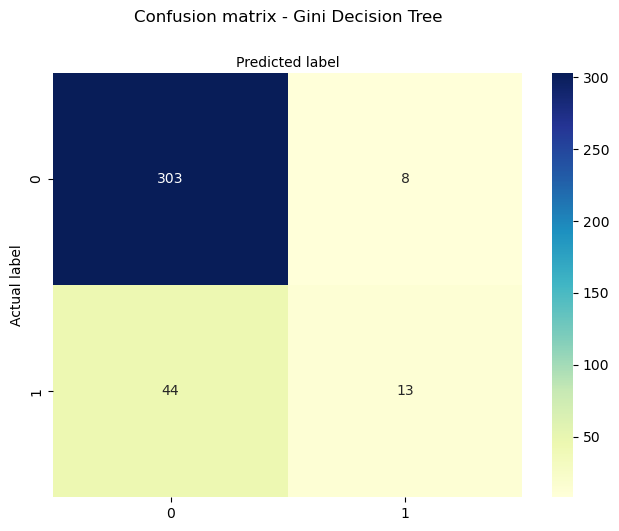

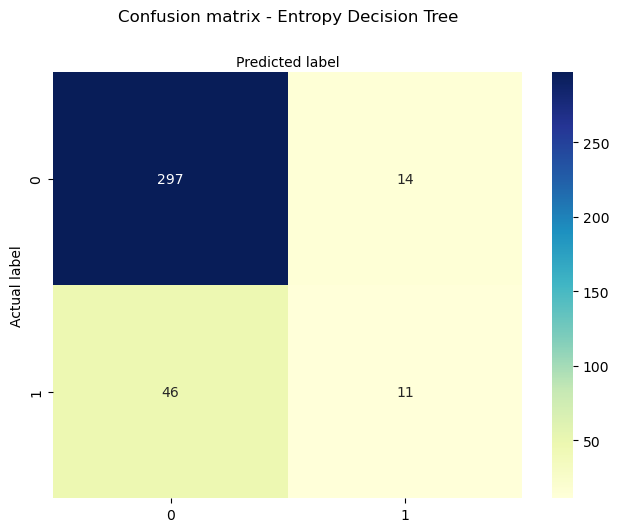

In [11]:
#----Gini
#Creating the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_gini)
class_names=[0,1] # name  of classes

#Creating the figure
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Adding the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Gini Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#----Entropy
#Creating the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_entropy)
class_names=[0,1] # name  of classes

#Creating the figure
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Adding the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Entropy Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [12]:
#Print a nicely formatted report
classify_dectree = classification_report(y_test, y_pred_gini)
print("\nClassification Report - Gini")
print(classify_dectree)

classify_dectree = classification_report(y_test, y_pred_entropy)
print("\nClassification Report - Entropy")
print(classify_dectree)



Classification Report - Gini
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       311
           1       0.62      0.23      0.33        57

    accuracy                           0.86       368
   macro avg       0.75      0.60      0.63       368
weighted avg       0.83      0.86      0.83       368


Classification Report - Entropy
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       311
           1       0.44      0.19      0.27        57

    accuracy                           0.84       368
   macro avg       0.65      0.57      0.59       368
weighted avg       0.80      0.84      0.81       368



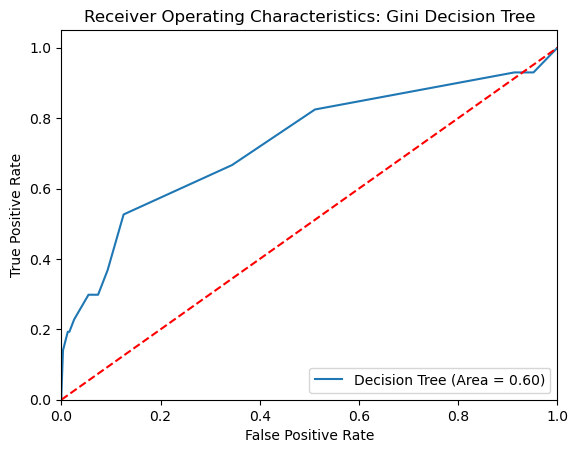

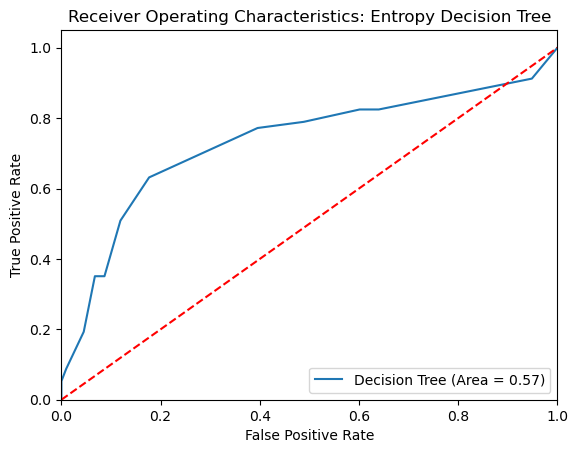

In [13]:

#Plot the ROC curve for the Gini Decision Tree
dt_roc_auc = roc_auc_score(y_test,y_pred_gini)
fpr, tpr, thresholds = roc_curve(y_test,dt.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (Area = %0.2f)' % dt_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics: Gini Decision Tree')
plt.legend(loc="lower right")
plt.show()

#Plot the ROC curve for the Entropy Decision Tree
dt1_roc_auc = roc_auc_score(y_test,y_pred_entropy)
fpr, tpr, thresholds = roc_curve(y_test,dt1.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (Area = %0.2f)' % dt1_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics: Entropy Decision Tree')
plt.legend(loc="lower right")
plt.show()



Gini Decision Tree without PCA
Nodes: 31
Depth: 4


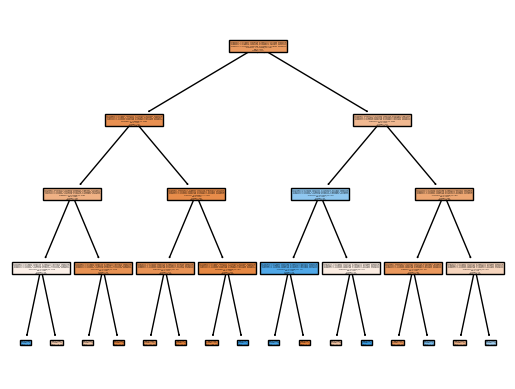

In [14]:

# Number of nodes and depth of decision tree without PCA
#--- Gini
n_nodes = dt.tree_.node_count
n_nodes

depth = dt.tree_.max_depth
depth

print('Gini Decision Tree without PCA')
print('Nodes:',n_nodes)
print('Depth:',depth)

plot_tree(dt,filled=True,feature_names=X_test);


Entropy Decision Tree without PCA
Nodes: 29
Depth: 4


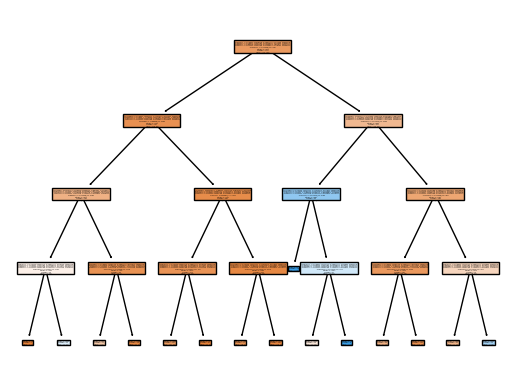

In [15]:

#--- Entropy
n_nodes = dt1.tree_.node_count
n_nodes

depth = dt1.tree_.max_depth
depth

print('Entropy Decision Tree without PCA')
print('Nodes:',n_nodes)
print('Depth:',depth)

plot_tree(dt1,filled=True,feature_names=X_test);


In [16]:
# Make an instance of the model and specify that 90% of the variance needs to be retained
n = 90
pca = PCA(n/100)

# Fit the PCA on the training set
pca.fit(X_train)

print('To retain',n,'% of the variation, we needed',pca.n_components_,'components')



To retain 90 % of the variation, we needed 21 components


In [17]:

# Applying transformation to both Training and Test set

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)



In [18]:
#----Gini
start = time.time()

#Instantiate the model, run with gini
dt_pca = DecisionTreeClassifier(max_depth=4, random_state=1,criterion ='gini')
#Fit the model with data
dt_pca.fit(X_train,y_train)

end = time.time()
dt_time = end-start
print('Train Time (seconds) of Gini Decision Tree with PCA:',dt_time)

y_pred_gini_pca = dt_pca.predict(X_test)

#----Entropy
start = time.time()

#Instantiate the model, run with gini
dt1_pca = DecisionTreeClassifier(max_depth=4, random_state=1,criterion ='entropy')
#Fit the model with data
dt1_pca.fit(X_train,y_train)

end = time.time()
dt1_time = end-start
print('Train Time (seconds) of Entropy Decision Tree with PCA:',dt1_time)

y_pred_entropy_pca = dt1_pca.predict(X_test)



Train Time (seconds) of Gini Decision Tree with PCA: 0.0107269287109375
Train Time (seconds) of Entropy Decision Tree with PCA: 0.008554935455322266


In [19]:

#Compare the predictions for each model
print("Gini Accuracy:", accuracy_score(y_test,y_pred_gini_pca))

print("Entropy Accuracy:", accuracy_score(y_test,y_pred_entropy_pca))


Gini Accuracy: 0.8586956521739131
Entropy Accuracy: 0.8369565217391305


Text(0.5, 427.9555555555555, 'Predicted label')

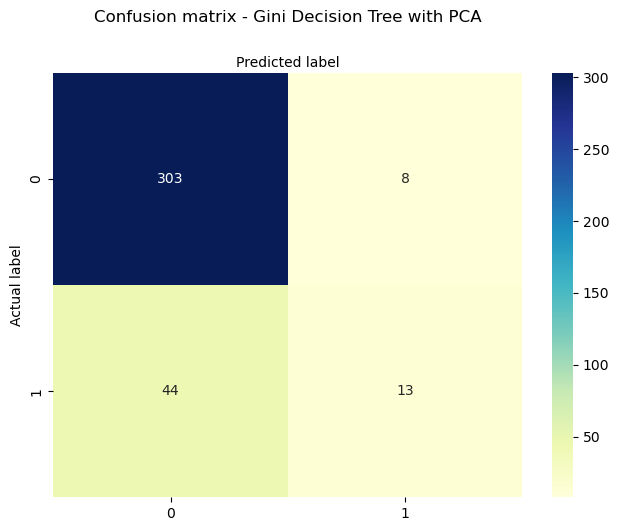

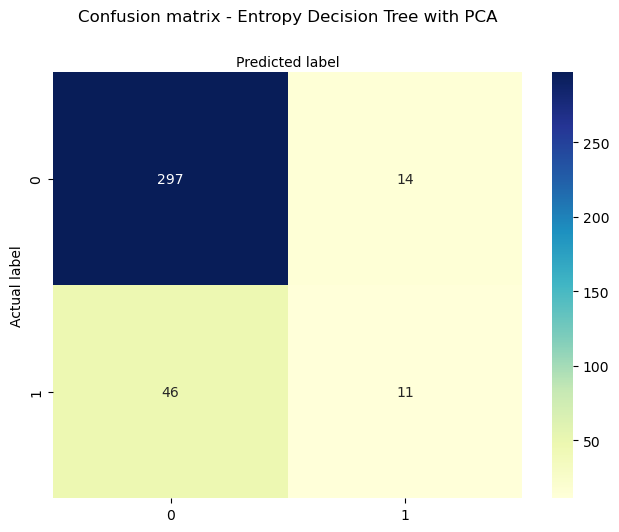

In [20]:

#----Gini
#Creating the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_gini_pca)
class_names=[0,1] # name  of classes

#Creating the figure
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Adding the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Gini Decision Tree with PCA', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#----Entropy
#Creating the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_entropy_pca)
class_names=[0,1] # name  of classes

#Creating the figure
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Adding the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Entropy Decision Tree with PCA', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
#Print a nicely formatted report
classify_dectree = classification_report(y_test, y_pred_gini_pca)
print("\nClassification Report - Gini with PCA")
print(classify_dectree)

classify_dectree = classification_report(y_test, y_pred_entropy_pca)
print("\nClassification Report - Entropy with PCA")
print(classify_dectree)



Classification Report - Gini with PCA
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       311
           1       0.62      0.23      0.33        57

    accuracy                           0.86       368
   macro avg       0.75      0.60      0.63       368
weighted avg       0.83      0.86      0.83       368


Classification Report - Entropy with PCA
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       311
           1       0.44      0.19      0.27        57

    accuracy                           0.84       368
   macro avg       0.65      0.57      0.59       368
weighted avg       0.80      0.84      0.81       368



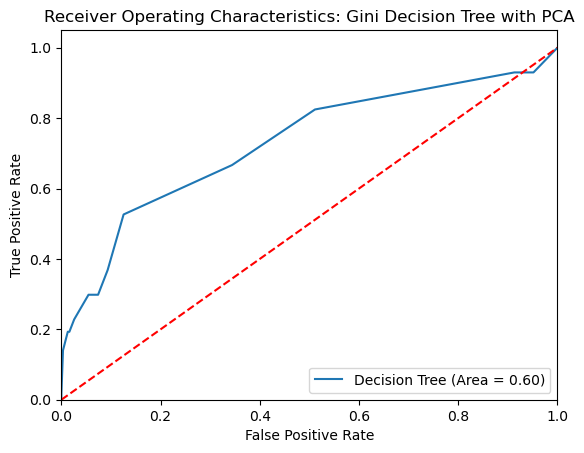

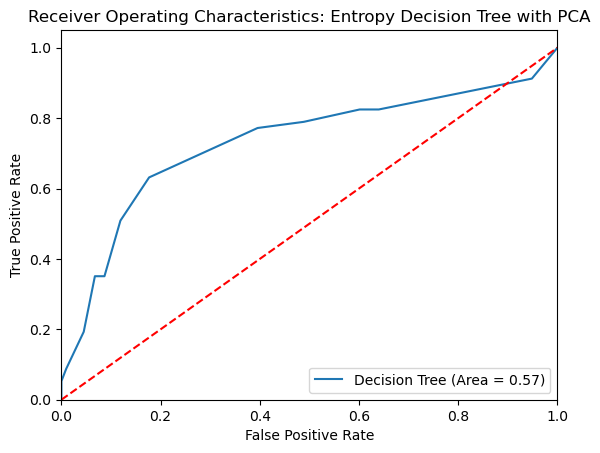

In [22]:

#Plot the ROC curve for the Gini Decision Tree
dt_roc_auc = roc_auc_score(y_test,y_pred_gini_pca)
fpr, tpr, thresholds = roc_curve(y_test,dt_pca.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (Area = %0.2f)' % dt_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics: Gini Decision Tree with PCA')
plt.legend(loc="lower right")
plt.show()

#Plot the ROC curve for the Entropy Decision Tree
dt1_roc_auc = roc_auc_score(y_test,y_pred_entropy_pca)
fpr, tpr, thresholds = roc_curve(y_test,dt1_pca.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (Area = %0.2f)' % dt1_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics: Entropy Decision Tree with PCA')
plt.legend(loc="lower right")
plt.show()


Gini Decision Tree with PCA
Nodes: 31
Depth: 4


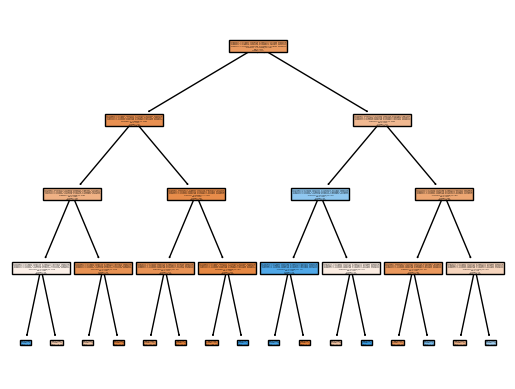

In [23]:
# Number of nodes and depth of decision tree with PCA
#--- Gini
n_nodes = dt_pca.tree_.node_count
n_nodes

depth = dt_pca.tree_.max_depth
depth

print('Gini Decision Tree with PCA')
print('Nodes:',n_nodes)
print('Depth:',depth)

plot_tree(dt_pca,filled=True,feature_names=X_test);
